<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/Rechaza_banda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Filtro rechaza banda digital IIR y señal ECG 
###<center>Catedrático: Dr. Alain Manzo Martínez 
###<center>Estudiante:Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

In [ ]:
#@title Filtro rechaza banda IIR y señal ECG

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 0, 'Frecuencia en Hertz')

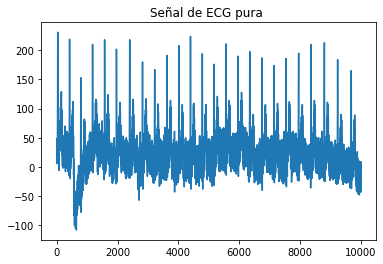

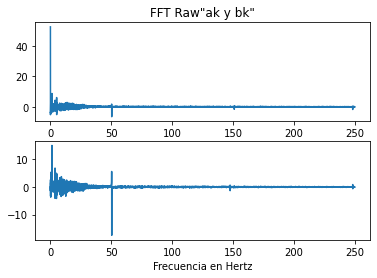

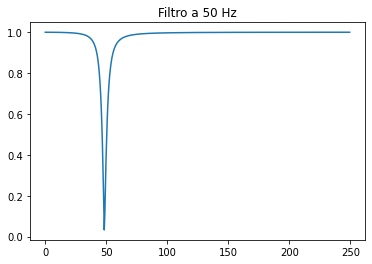

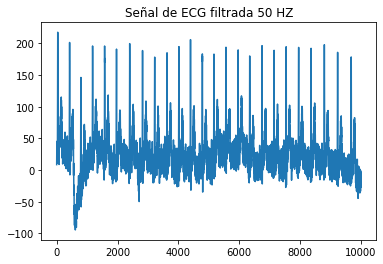

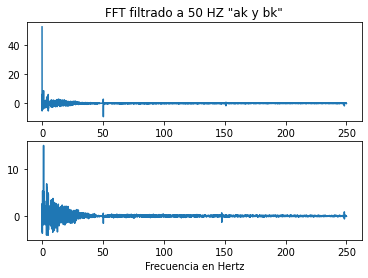

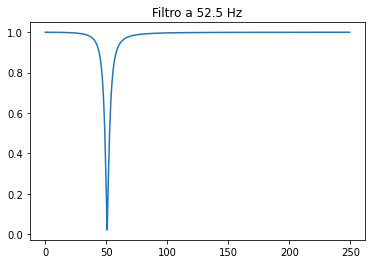

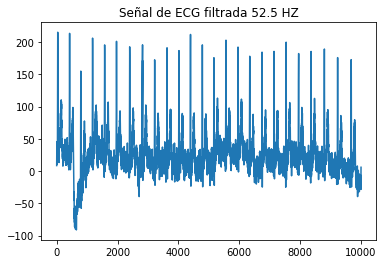

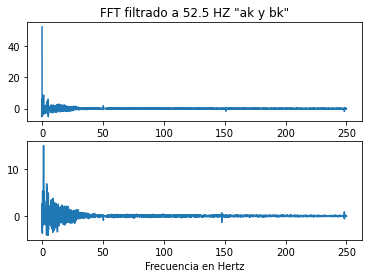

In [ ]:
# =============================================================================
#                           FILTRO PASA ALTAS                                                                        
# =============================================================================


import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate
#import sys

# =============================================================================
#                   Abre señal de ECG (Base de datos Physionet)
# =============================================================================


file = open('/content/drive/MyDrive/procesamiento/Unidad2/DataSetPhysionet/ecg.txt',"r")
#Reemplaza el \n por un espacio ' '
openedFile = file.read().replace('\n',' ')
#Divide los datos y genera una lista con datos del tipo string
data_str = openedFile.split(' ')
#Convierte los datos del tipo string a un tipo entero
data_num = list(map(int,data_str))
#Cantidad de datos en el archivo
array_length = len(data_num)
#Declaramos dos arreglos con ceros del tamaño de array_length
filtered_signal = np.zeros(int(array_length/2))
raw_signal = np.zeros(int(array_length/2))
#Ciclo para separar señales
i = 0
j = 0
while(j < array_length):
    raw_signal[i] = data_num[j]
    filtered_signal[i] = data_num[j+1]
    j += 2
    i += 1
#Gráficos
plt.figure(1)
plt.plot(raw_signal)
plt.title('Señal de ECG pura ')


signal2 = raw_signal
M = len(signal2)

signal2[M-1] = signal2[0]
#Frecuencia de muestreo en Hertz
fs = 500
#Periodo de muestreo
ts = 1/fs
#Vector de tiempos
l = np.arange(0,M)
t = l*ts 


# =============================================================================
#                          Análisis en Frecuencia
# =============================================================================


N = len(signal2)
ye=signal2
Nt = N-1
fact = 2/Nt
inc = 2*np.pi/Nt
tn = np.linspace(0,2*np.pi-inc,Nt)
#Cálcula el coeficiente a0
a0 = fact*np.sum(ye[0:Nt])
#Número de componentes de frecuencia
K = int(Nt/2+1)
#Periodo de la señal
T = M*ts
#Frecuencia fundamental
fo = 1/T
#Inicializa arreglos para ak,bk,ck,phik y fk
ak = np.zeros(K)
bk = np.zeros(K)
ck = np.zeros(K)
fk = np.zeros(K)
#Asignar el valor de a0 en ak y ck
ak[0] = a0
ck[0] = np.abs(a0)

        
#Calcula los coeficientes de la serie de Fourier
def FFT(fact,ye,K,tn,fo):

    
    a0 = fact*np.sum(ye[0:Nt])

    
    #Inicializa arreglos para ak,bk,ck,phik y fk
    ak = np.zeros(K)
    bk = np.zeros(K)
    ck = np.zeros(K)
    fk = np.zeros(K)
    for k in range(1,K):
        ak[0] = a0
        ck[0] = np.abs(a0)

        #Coeficientes Rectangulares
        ak[k] = fact*np.sum(ye[0:Nt]*np.cos(k*tn))
        bk[k] = fact*np.sum(ye[0:Nt]*np.sin(k*tn))
    
        #Múltiplos de la frecuencia fundamental
        fk[k] = k*fo
    
    return ak,bk,fk
    
ak, bk, fk=FFT(fact,ye,K,tn,fo)

#Gráfico
plt.figure(2)
plt.subplot(2,1,1)
plt.plot(fk,ak)
plt.title('FFT Raw"ak y bk"')
plt.subplot(2,1,2)
plt.plot(fk,bk)
plt.xlabel('Frecuencia en Hertz')    
    

# =============================================================================
#                   Filtro análogico 
# =============================================================================
#                   Filtor rechaza banda 
#Frecuencia central en Hz

fo = 50
wo = fo*np.pi*2

Q=7
B=wo/Q


# =============================================================================
#                   DISEÑO DEL FILTRO
# =============================================================================

#Periodo de muestreo 
ts= 1/fs
#Numerador de la frecuencia de transferencia de H(z)
numz = [4+wo**2*ts**2,2*wo**2*ts**2-8,4+wo**2*ts**2]
#Denominador de la función de transferencia de H(z)
denz = [4+2*B*ts+wo**2*ts**2,2*wo**2*ts**2-8,4-2*B*ts+wo**2*ts**2]
#Respuesta en frecuencia del filtro digital
wz, Hwz = signal.freqz(numz,denz)
#Convierte en wz a frecuencia digital o normalizada
F = wz/(2*np.pi)
#Convierte frecuencia digital a Heartz
f = F*fs
#Se obtiene el módulo de Hwz
Hwzm = np.abs(Hwz)
#Gráfico 
plt.figure(3)
plt.plot(f,Hwzm)
plt.title("Filtro a 50 Hz")

fiH_signal=signal.lfilter(numz,denz,raw_signal)
plt.figure(4)
plt.plot(fiH_signal)
plt.title('Señal de ECG filtrada 50 HZ')


xe=fiH_signal

ak2, bk2, fk2=FFT(fact,xe,K,tn,fo)

#Gráfico
plt.figure(5)
plt.subplot(2,1,1)
plt.plot(fk,ak2)
plt.title('FFT filtrado a 50 HZ "ak y bk"')
plt.subplot(2,1,2)
plt.plot(fk,bk2)
plt.xlabel('Frecuencia en Hertz')    
    





# =============================================================================
#                   Filtro análogico 
# =============================================================================
#                   Filtor rechaza banda 
#Frecuencia central en Hz

fo = 52.5
wo = fo*np.pi*2

#Wo 
wo = fo*np.pi*2


Q=7
B=wo/Q


# =============================================================================
#                   DISEÑO DEL FILTRO
# =============================================================================

#Periodo de muestreo 
ts= 1/fs
#Numerador de la frecuencia de transferencia de H(z)
numz = [4+wo**2*ts**2,2*wo**2*ts**2-8,4+wo**2*ts**2]
#Denominador de la función de transferencia de H(z)
denz = [4+2*B*ts+wo**2*ts**2,2*wo**2*ts**2-8,4-2*B*ts+wo**2*ts**2]
#Respuesta en frecuencia del filtro digital
wz, Hwz = signal.freqz(numz,denz)
#Convierte en wz a frecuencia digital o normalizada
F = wz/(2*np.pi)
#Convierte frecuencia digital a Heartz
f = F*fs
#Se obtiene el módulo de Hwz
Hwzm = np.abs(Hwz)
#Gráfico 
plt.figure(6)
plt.plot(f,Hwzm)
plt.title("Filtro a 52.5 Hz")

fiH_signal=signal.lfilter(numz,denz,raw_signal)
plt.figure(7)
plt.plot(fiH_signal)
plt.title('Señal de ECG filtrada 52.5 HZ')


xe=fiH_signal

ak2, bk2, fk2=FFT(fact,xe,K,tn,fo)

#Gráfico
plt.figure(8)
plt.subplot(2,1,1)
plt.plot(fk,ak2)
plt.title('FFT filtrado a 52.5 HZ "ak y bk"')
plt.subplot(2,1,2)
plt.plot(fk,bk2)
plt.xlabel('Frecuencia en Hertz')    
    



#Conlusiones 
El diseño de filtros digitales es una gran herramienta en la preactica para eliminar ruidos, o dejar componentes de interes a una señal.

En este caso se pudo observar que los filtros quedan ligeramente desplazados hacia la izquierda, lo cual podría ser por el hecho de la discretización de las ecuaciones, las cuales al tomar como incremento, $ts$ y no un diferencial pudiera generar una diferencia  